# Preparation


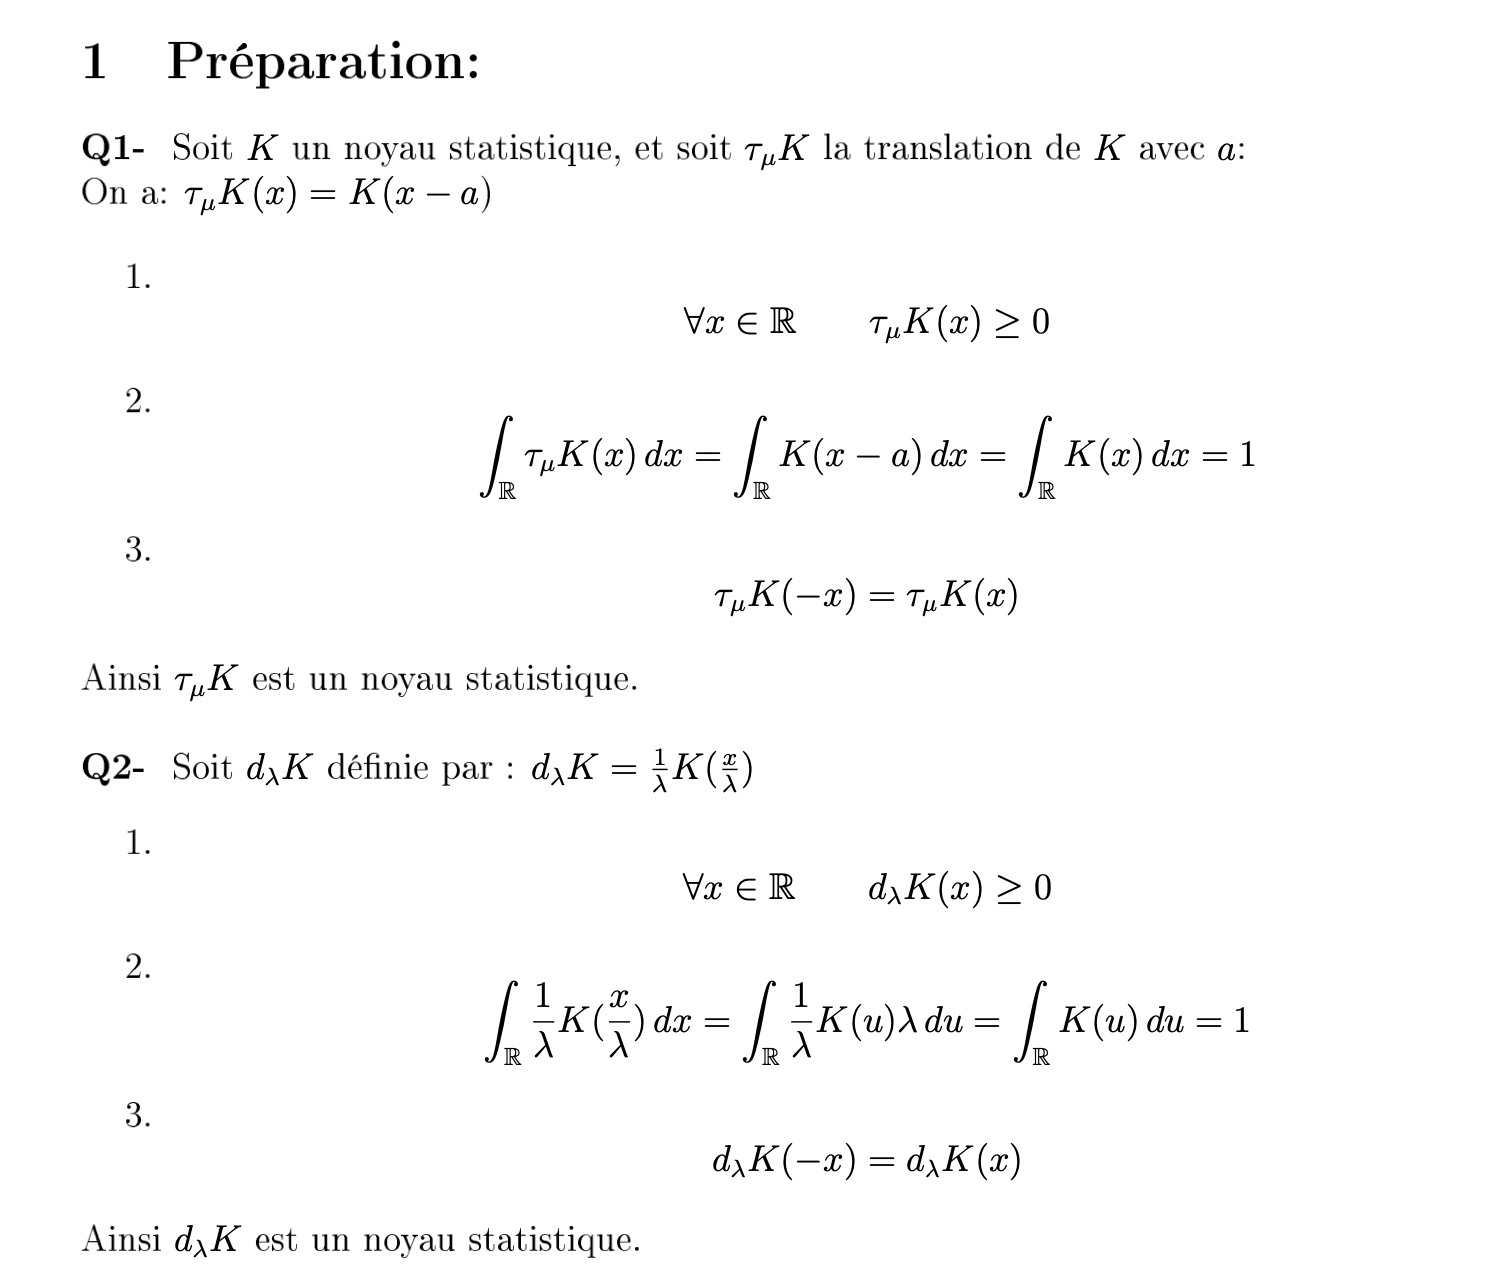

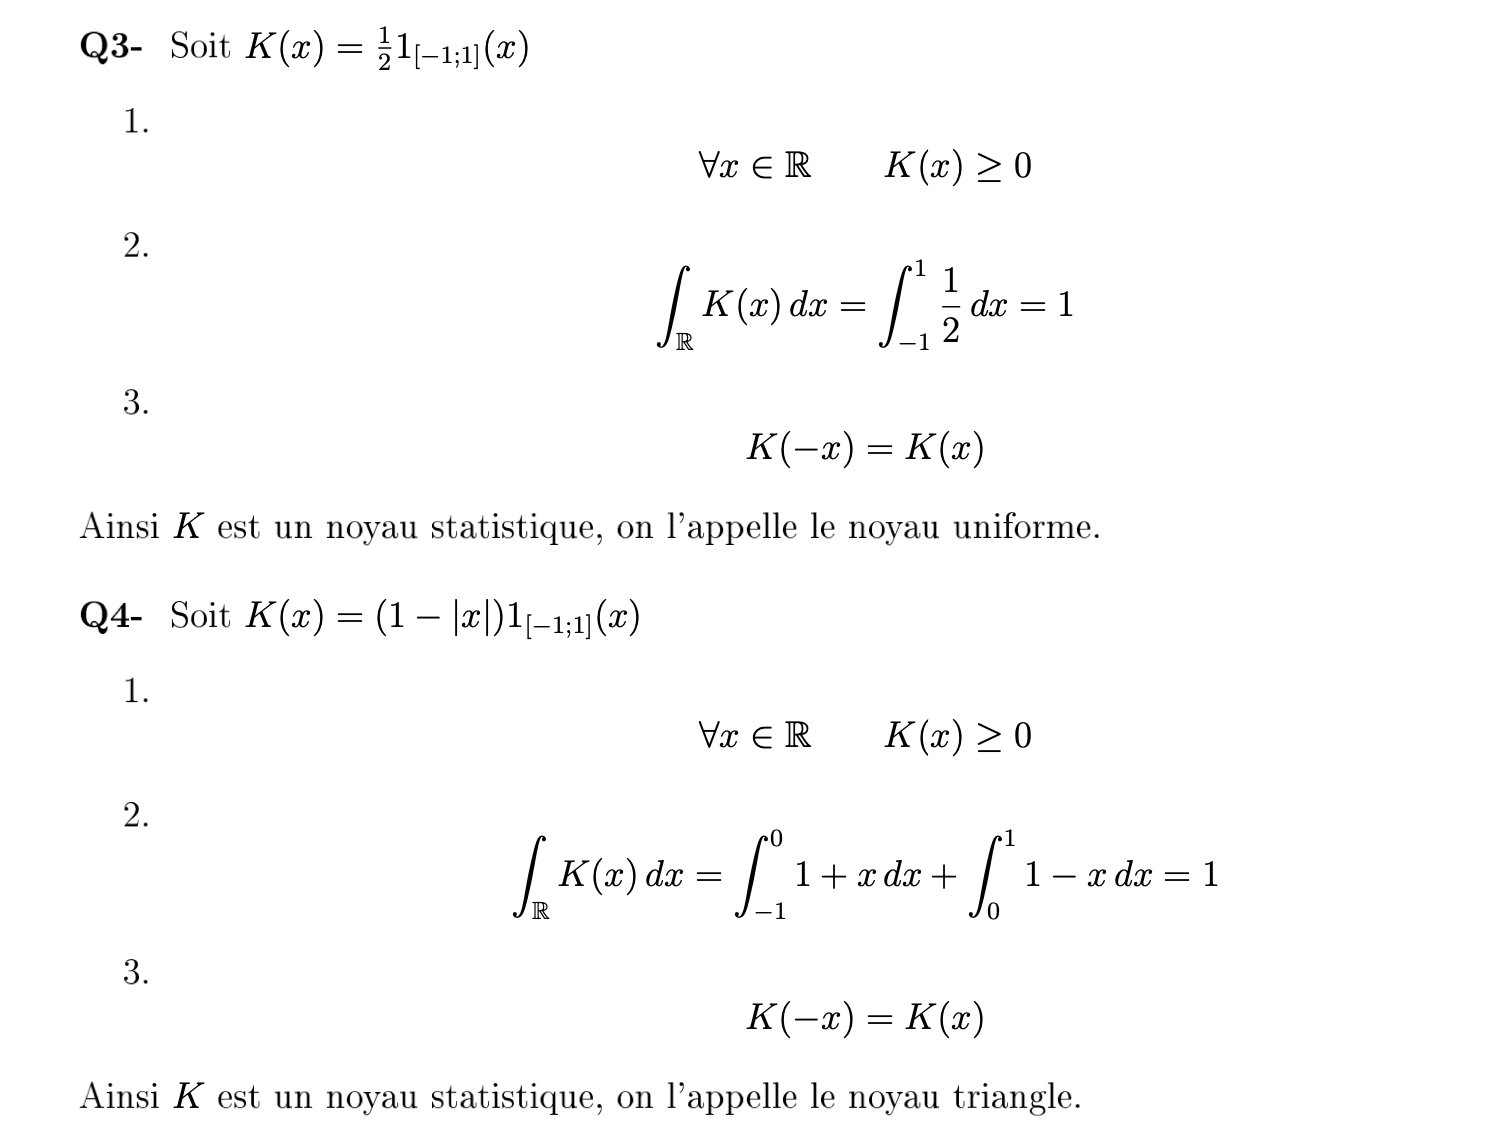

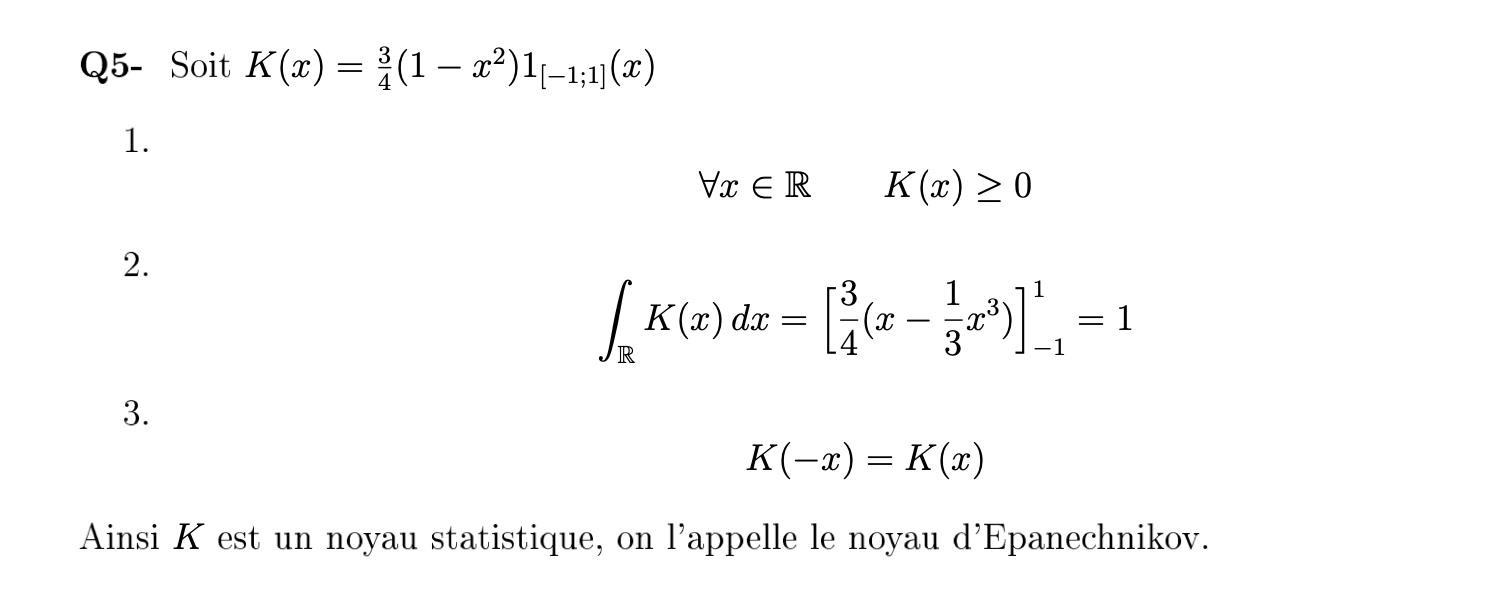

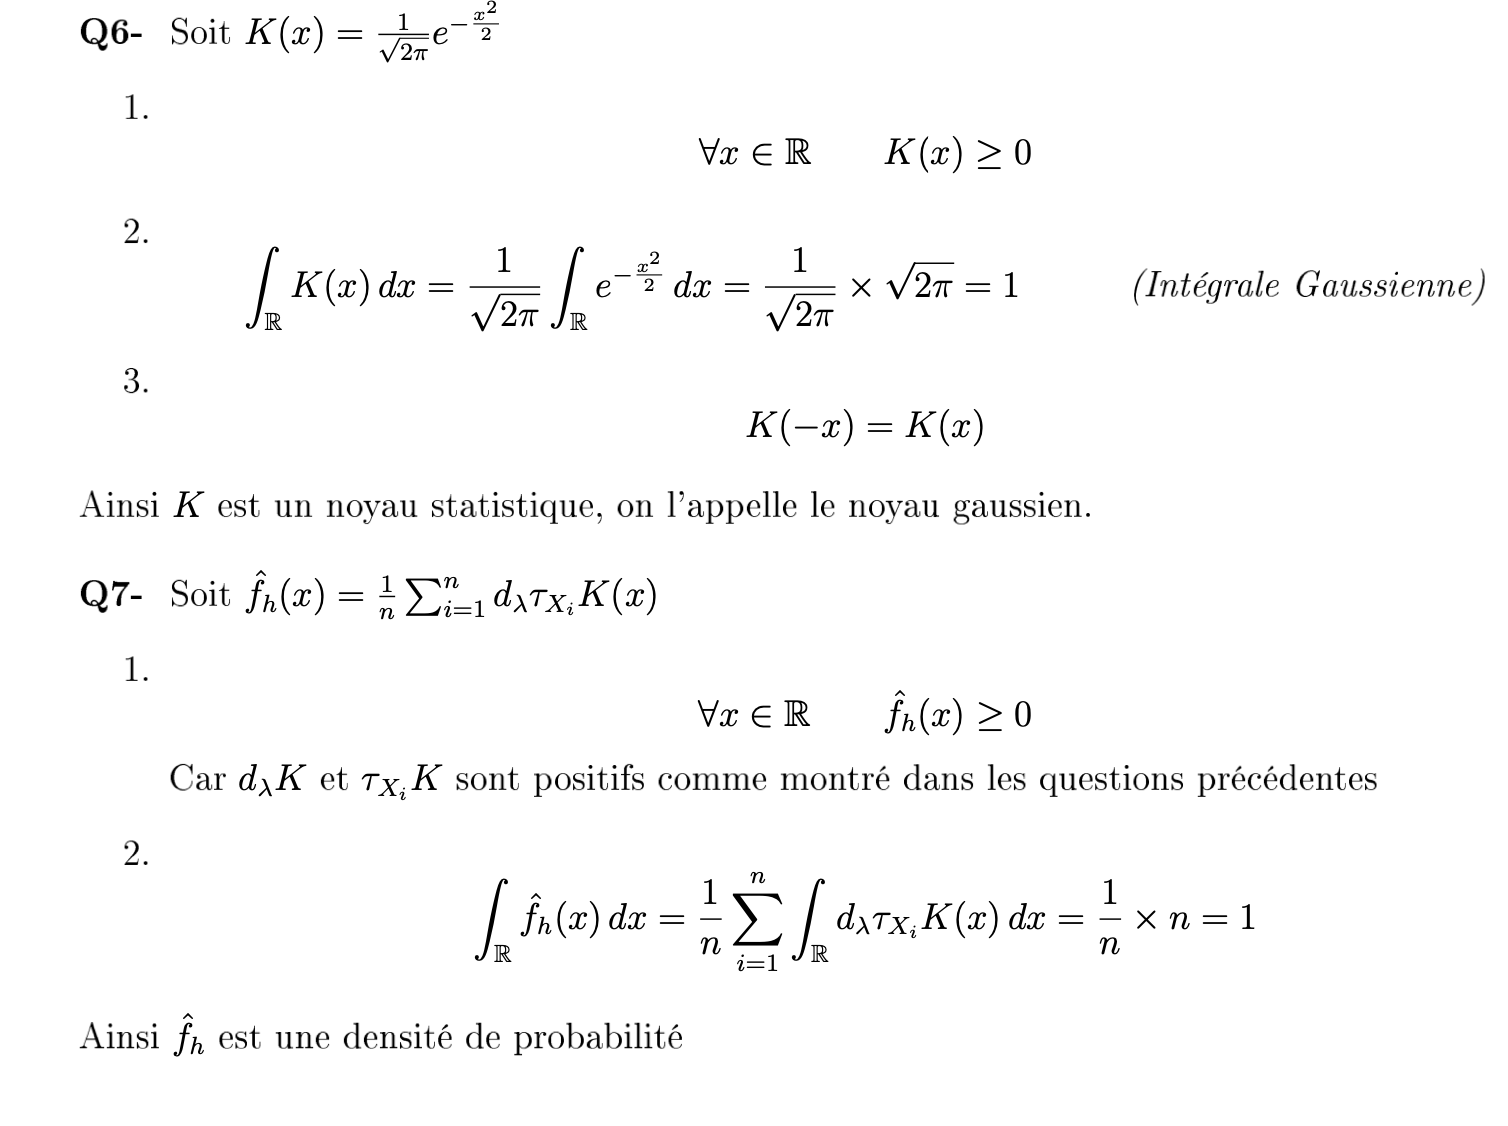

# TP3 : Estimation de densité
Dans ce TP, nous utiliserons le langage Python. Il y’a plusieurs manière de l’utiliser, premièrement,
il faut une partie d’écriture de programmes (au format .py) qui peut seulement être faite avec n’importe
quel éditeur de texte, il y’a ensuite un logiciel de compilation des programmes Python, vous pouvez
utiliser celui de votre choix. Chaque graphique demandé dans ce TP sera à enregistrer au format PiNOM1NOM2Qj.png où i est le numéro de la partie en question, j est le numéro de la question au sein
de la partie considérée et NOM1 et NOM2 sont les deux noms de famille des deux membres du binôme
de TP. Chaque question comportant le symbole ? nécessitera la création d’un graphique à enregistrer
comme spécifié ci-dessus. S’il y’a plusieurs graphiques à faire pour une seule question, ils seront nommés
PiNOM1NOM2Qja.png, PiNOM1NOM2Qjb.png etc...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

In [ ]:
def reference(x): #la densité à estimer
        return 1/(np.sqrt(2*np.pi))*np.exp(-x**2/2)

# Partie 1

Le but de cette partie est de définir, représenter et comparer l’efficacité des quatre noyaux de la
préparation pour l’estimation de la densité d’une gaussienne standard f. On suppose donc que X1, . . . , Xn
est un échantillon de taille n de variables indépendantes et identiquement distribuées selon la loi normale
centré réduite de densité f. Télécharger le script TP3.py disponible sur Moodle, c’est dans ce script que
vous définirez toutes les fonctions et répondrez aux questions.

---





### Question 1
Définir quatre fonctions K1, K2, K3, K4 correspondant respectivement aux
noyaux uniforme, triangle, d’Epanechnikov et gaussien.

In [ ]:
def K1(x):
    if abs(x) <= 1:
        return 0.5
    else:
        return 0

    
    
def K2(x):
    if abs(x) <= 1:
        return 1 - abs(x)
    else:
        return 0

        

def K3(x):
    if abs(x) <= 1:
        return (3/4) * (1 - x**2)
    else:
        return 0

        
import math

def K4(x):
    return (1/math.sqrt(2*math.pi)) * math.exp(-0.5*x**2)



### Question 2
Représentez ces quatre noyaux sur un même graphique (utiliser une légende et des couleurs
différentes). Créer une fonction pour faire cette question que vous nommerez AllplotK qui prendra
en entrée les paramètres du graphique (le pas, xmin, xmax, les couleurs etc...) et représentera le
graphique en retour.

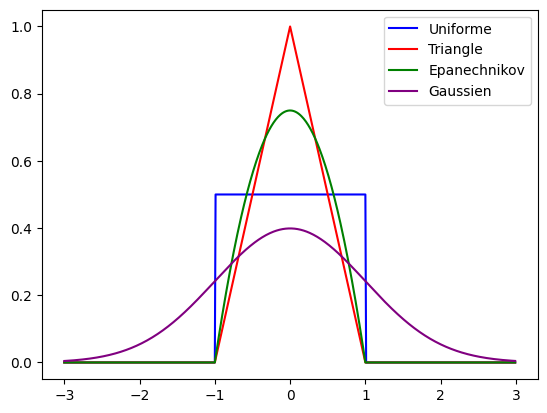

In [ ]:
def AllplotK(pas,xmin,xmax,col1,col2,col3,col4):
    x = np.arange(xmin, xmax, pas)
    y1 = [K1(xi) for xi in x]
    y2 = [K2(xi) for xi in x]
    y3 = [K3(xi) for xi in x]
    y4 = [K4(xi) for xi in x]
    
    plt.plot(x, y1, color=col1, label='Uniforme')
    plt.plot(x, y2, color=col2, label='Triangle')
    plt.plot(x, y3, color=col3, label='Epanechnikov')
    plt.plot(x, y4, color=col4, label='Gaussien')
    
    plt.legend()
    plt.show()

AllplotK(0.01, -3, 3, 'blue', 'red', 'green', 'purple')


On peut observer que chaque noyau a une forme caractéristique, qui traduit les propriétés statistiques sous-jacentes qu'il cherche à capturer. Le choix d'un noyau adapté dépendra donc de la nature des données et de l'objectif de l'analyse.

### Question 3
Générer une réalisation de l’échantillon aléatoire X selon la loi gaussienne standard de taille n. (n
est pour l’instant fixé à 100 dans le script).

(array([ 1.,  6.,  7., 20., 18., 15., 14., 14.,  4.,  1.]),
 array([-2.498681  , -1.96352516, -1.42836932, -0.89321348, -0.35805763,
         0.17709821,  0.71225405,  1.24740989,  1.78256573,  2.31772157,
         2.85287742]),
 <BarContainer object of 10 artists>)

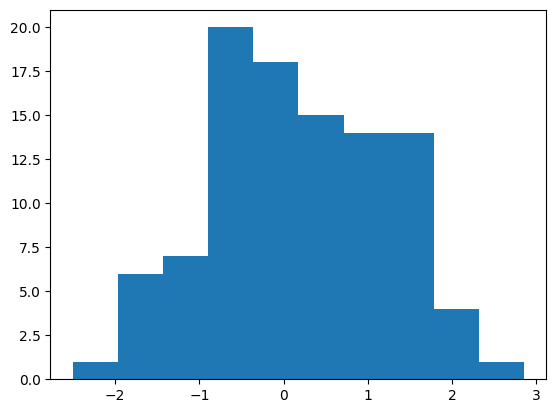

In [ ]:
n = 100
X = np.random.randn(n)
plt.hist(X)

### Question 4
Définir la fonction fchapeau qui prend comme argument une fonction K (le noyau), la fenêtre h
et la réalisation de l’échantillon X et une variable x et qui retourne l’image de x par la fonction
fbh.

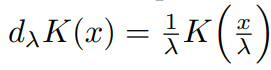

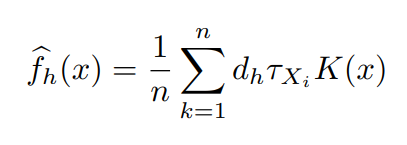

Donc: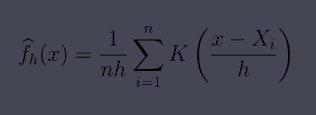

In [ ]:
##def fchapeau(funct,h,x): #l'estimation de la densite f (ici la gaussienne standard, pour une fenetre h, au point x pour le noyau funct)
# Question 4
def fchapeau(funct, h, x,X):
    s = 0
    for i in range(len(X)):
        s += (1/h)*(funct(x/h-X[i]/h))
    return (1/len(X))*s



    


### Question 5
Représenter sur un même graphique la fonction f de référence ainsi que les quatres fonctions fbh
obtenues avec les noyaux K1, K2, K3, K4. Vous ajouterez une légende et des couleurs différentes à
toutes les courbes. On fixera pour cette question h = 2. Vous définierez une fonction comme dans
la question 2 pour faire cette question. Cette fonction sera nommée Allplotfchapeauh2.



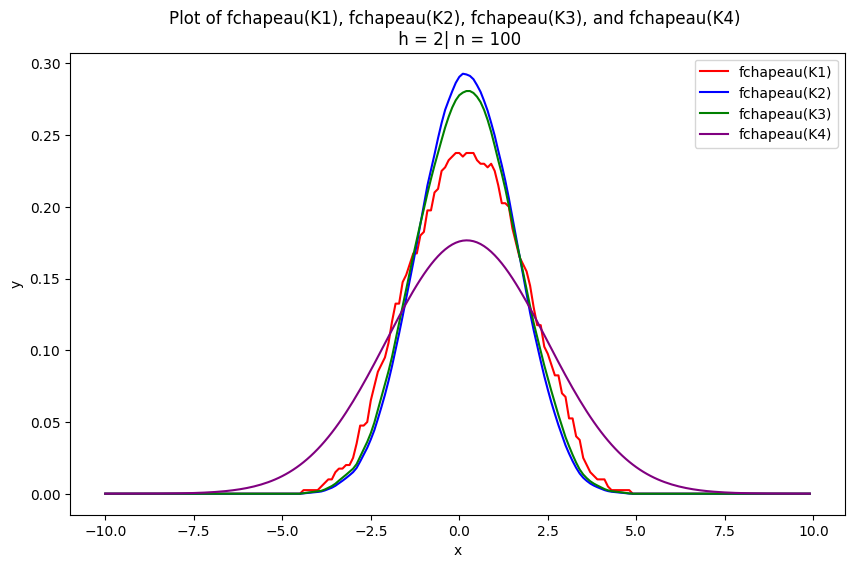

In [ ]:
# Question 5
def Allplotfchapeauh2(xmin, xmax, pas, col1, col2, col3, col4,X):
    h=2
    x = np.arange(xmin, xmax, pas)
    fig, ax = plt.subplots(figsize=(10,6))

    ax.plot(x, [fchapeau(K1, h, i,X) for i in x], color=col1, label='fchapeau(K1)')
    ax.plot(x, [fchapeau(K2, h, i,X) for i in x], color=col2, label='fchapeau(K2)')
    ax.plot(x, [fchapeau(K3, h, i,X) for i in x], color=col3, label='fchapeau(K3)')
    ax.plot(x, [fchapeau(K4, h, i,X) for i in x], color=col4, label='fchapeau(K4)')
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Plot of fchapeau(K1), fchapeau(K2), fchapeau(K3), and fchapeau(K4) \n h = ' + str(h) + '| n = ' + str(len(X)))
    plt.show()


Allplotfchapeauh2(-10, 10, 0.1, 'red', 'blue', 'green', 'purple',X)

### Question 6
Refaire la question précédente avec h = 1. Qualitativement, est-ce que l’estimation diffère plus
lorsque l’on fait varier le noyau utilisé ou la fenêtre h utilisée ? La nouvelle fonction pour cette
question sera nommée Allplotfchapeauh1.

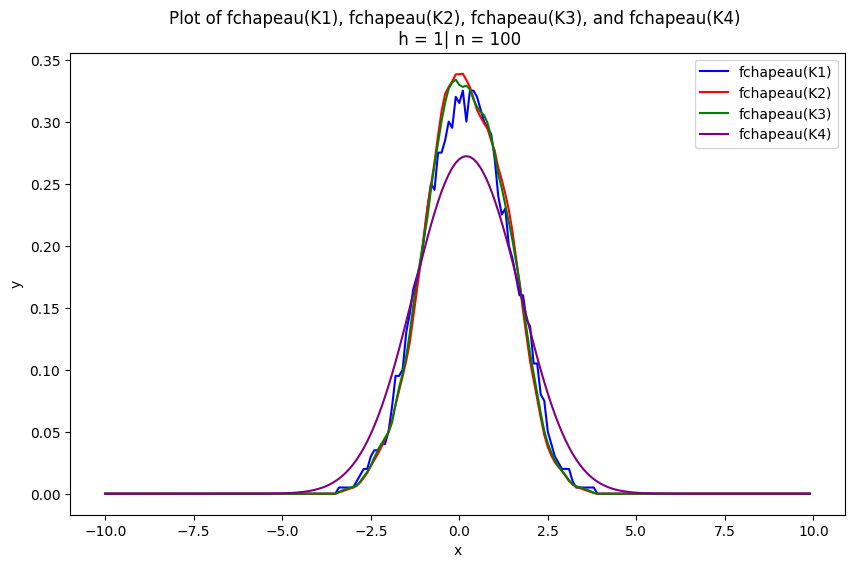

In [ ]:
def Allplotfchapeauh1(xmin, xmax, pas, col1, col2, col3, col4,X):
    h = 1
    x = np.arange(xmin, xmax, pas)
    fig, ax = plt.subplots(figsize=(10,6))

    ax.plot(x, [fchapeau(K1, h, i,X) for i in x], color=col1, label='fchapeau(K1)')
    ax.plot(x, [fchapeau(K2, h, i,X) for i in x], color=col2, label='fchapeau(K2)')
    ax.plot(x, [fchapeau(K3, h, i,X) for i in x], color=col3, label='fchapeau(K3)')
    ax.plot(x, [fchapeau(K4, h, i,X) for i in x], color=col4, label='fchapeau(K4)')
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Plot of fchapeau(K1), fchapeau(K2), fchapeau(K3), and fchapeau(K4) \n h = ' + str(h) + '| n = ' + str(len(X)))
    plt.show()


Allplotfchapeauh1(-10, 10, 0.1, 'blue', 'red', 'green', 'purple',X)

En utilisant h=1, on peut observer que la fonction de référence (la gaussienne standard) est mieux approchée par les fonctions fchapeau obtenues avec les noyaux K3 (Epanechnikov) et K4 (gaussien), qui sont plus lisses que les noyaux K1 (uniforme) et K2 (triangle). On peut également remarquer que la fonction fchapeau obtenue avec le noyau K3 a une amplitude plus grande que les autres fonctions fchapeau.

Cependant, en utilisant h=2, les fonctions fchapeau obtenues avec les noyaux K3 et K4 sont maintenant beaucoup plus proches de la fonction de référence, tandis que les fonctions fchapeau obtenues avec les noyaux K1 et K2 ont une forme beaucoup plus grossière et ne parviennent pas à capturer les caractéristiques importantes de la fonction de référence.

### Question 7
Reprendre les deux questions précédentes pour n = 10 puis n = 1000. Pour cette question, quatre
graphiques doivent être construits : le premier pour (n, h) = (10, 2), le second pour (n, h) = (10, 1),
le suivant pour (n, h) = (1000, 2) et le dernier pour (n, h) = (1000, 1). Vous détaillerez votre
raisonnement dans le script et commenterez les résultats obtenus. Revenir ensuite à la valeur de
n = 100 dans le script pour la suite du TP.


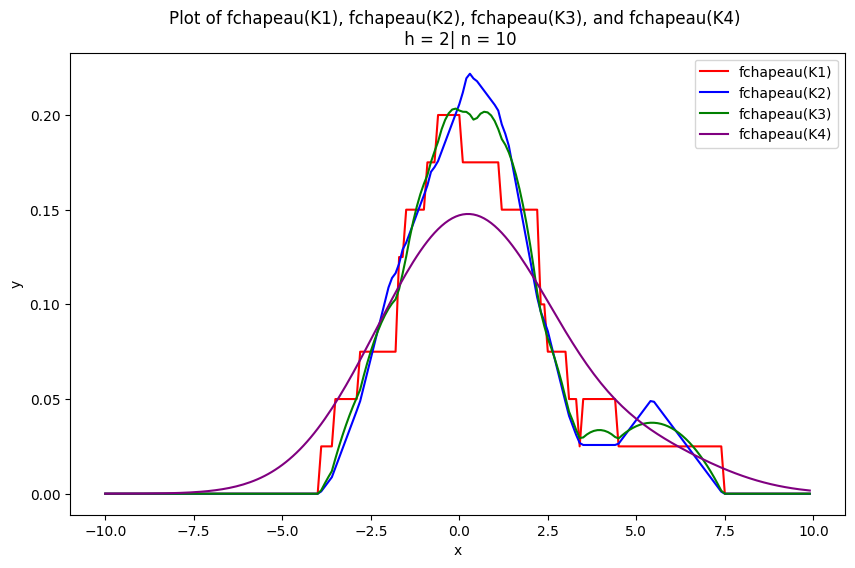

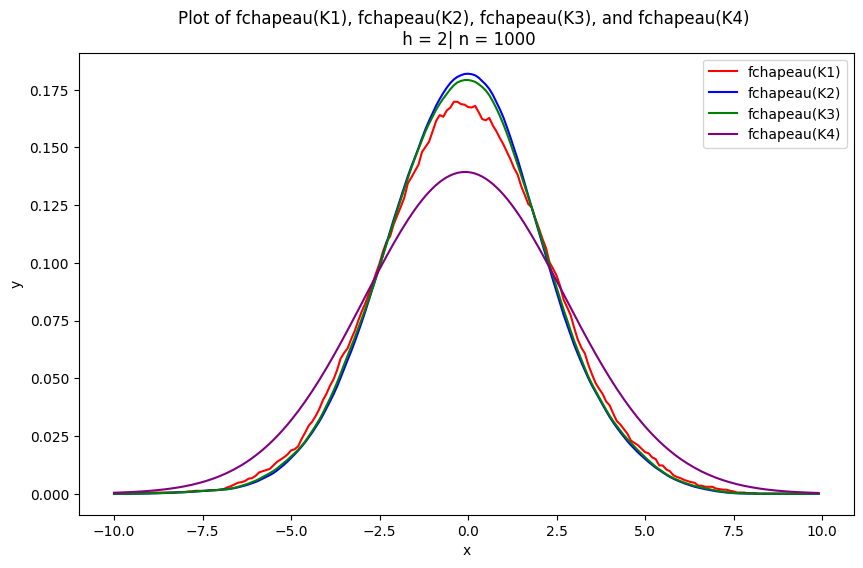

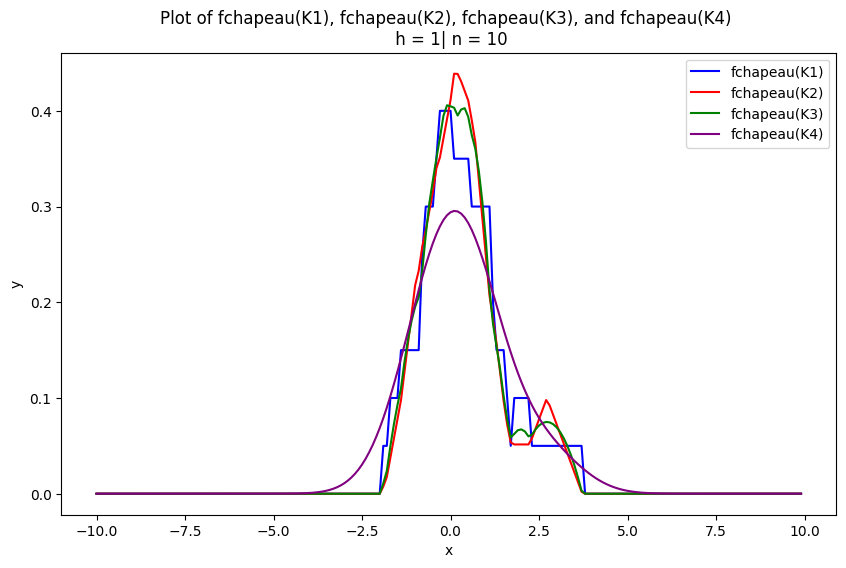

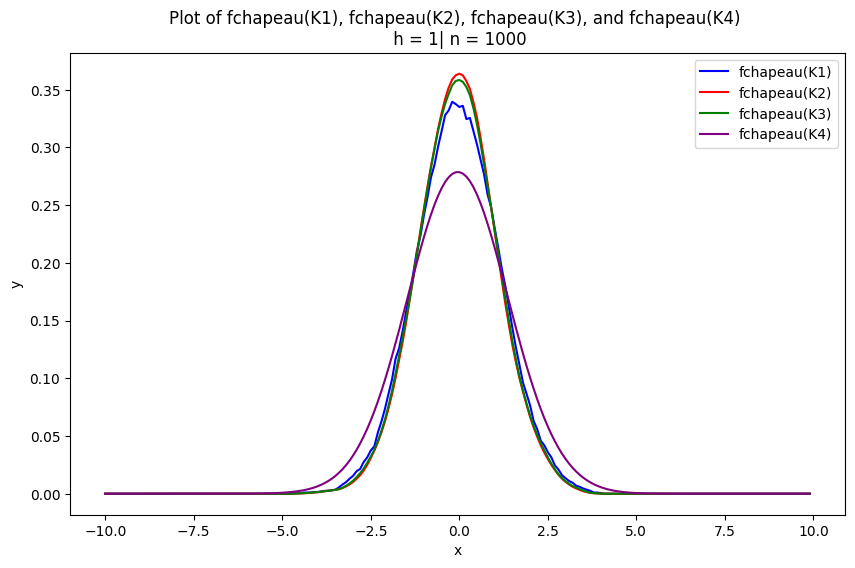

In [ ]:
n1 = 10
X1 = np.random.randn(n1)

n2 = 1000
X2 = np.random.randn(n2)

Allplotfchapeauh2(-10, 10, 0.1, 'red', 'blue', 'green', 'purple',X1) #(2,10)
Allplotfchapeauh2(-10, 10, 0.1, 'red', 'blue', 'green', 'purple',X2) #(2,1000)

Allplotfchapeauh1(-10, 10, 0.1, 'blue', 'red', 'green', 'purple',X1) #(1,10)
Allplotfchapeauh1(-10, 10, 0.1, 'blue', 'red', 'green', 'purple',X2) #(1,1000)

On obtient une meilleure estimation avec un nombre important d'échantillons et une valeur faible de la fenêtre h,car cela provoque l'apparition de details artificiels et donc augmente la précision de notre estimation.


---
Nous allons calculer l’erreur quadratique d’une estimation : soit

\begin{align}
\ SCE(h) = \sum_{i=0}^{500}(\widehat{f_{h}}(t_{i}) - f(t_{i})
)^{2}
\end{align}

la somme de carrés des écarts entre l’image de ti par l’estimation fbh et l’image de ti par f, où
{t0, t1, t2, . . . , t500} est une discrétisation de l’intervalle [−5, 5] de pas 10/500.
Autrement dit

\begin{align}
\text{-} 5= t_{0}<t_{1} = \text{-}5 + 10/500 < t_{2} = \text{-}5  + 20/500<...< t_{500} = \text{-}5 + 5000/500 = 5
\end{align}

### Question 8
Définir une fonction SCE qui prend comme paramètre une fonction (le noyau considéré), la fenêtre
h, la densité de référence f et qui retourne SCE(h).

In [ ]:
def SCE(funct, h, f):
    n = len(X)
    fbh = np.array([fchapeau(funct, h, x,X) for x in X])
    return np.sum((fbh - f(X))**2)


### Question 9
Définir une fonction lemeilleurh qui prend une fonction (le noyau en question) et une autre fonction f (la référence) en paramètres et retourne l’index divisé par 100 du minimum de la liste $\left \{SCE(k/100)  \right \}_{1\leq k\leq 200}$. 
Pour chaque noyau, la meilleur fenêtre pour l’etimation de la fonction de référence est donnée par cette fonction.

In [ ]:
def lemeilleurh(funct, f):
    scores = []
    for k in range(1, 201):
        h = k / 100
        score = SCE(funct, h, f)
        scores.append(score)
    best_h = np.argmin(scores) / 100
    return best_h



### Question 10

Définir alors une fonction qui représente graphiquement les quatres estimations de densité pour
ces quatre noyaux avec les fenêtre obtenue via la fonction lemeilleurh. Définir pour ce faire, la
fonction Allplotfchapeauhoptimal

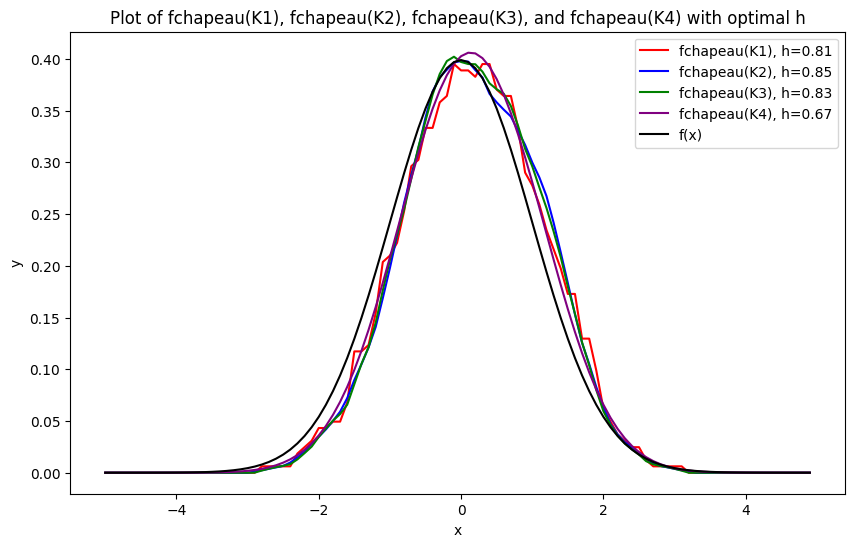

In [ ]:
def Allplotfchapeauhoptimal(xmin, xmax, pas, col1, col2, col3, col4, colref,X):
    f = norm.pdf
    h1 = lemeilleurh(K1, f) 
    h2 = lemeilleurh(K2, f) 
    h3 = lemeilleurh(K3, f) 
    h4 = lemeilleurh(K4, f) 
    x = np.arange(xmin, xmax, pas)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, [fchapeau(K1, h1, i,X) for i in x], color=col1, label=f'fchapeau(K1), h={h1}')
    ax.plot(x, [fchapeau(K2, h2, i,X) for i in x], color=col2, label=f'fchapeau(K2), h={h2}')
    ax.plot(x, [fchapeau(K3, h3, i,X) for i in x], color=col3, label=f'fchapeau(K3), h={h3}')
    ax.plot(x, [fchapeau(K4, h4, i,X) for i in x], color=col4, label=f'fchapeau(K4), h={h4}')
    ax.plot(x, f(x), color=colref, label='f(x)')
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Plot of fchapeau(K1), fchapeau(K2), fchapeau(K3), and fchapeau(K4) with optimal h')
    plt.show()

Allplotfchapeauhoptimal(-5, 5, 0.1, 'red', 'blue', 'green', 'purple', 'black',X)


Le graphique créé avec la fonction Allplotfchapeauhoptimal affiche les estimations de densité pour les quatre noyaux (K1, K2, K3, K4), avec les fenêtres optimales obtenues grâce à la fonction lemeilleurh. Les estimations de densité pour tous les noyaux, avec les fenêtres optimales, montrent une tendance à s'approcher de la fonction de référence. On peut remarquer que le noyau K1 a une forme en dents de scie, tandis que les noyaux K2 et K3 ont une forme plus régulière. Enfin, le noyau K4 a une forme très étroite et pointue. Les couleurs rouge, verte, violette et noire représentent les estimations de densité pour les noyaux K1, K2, K3 et K4, respectivement, alors que la fonction de référence est représentée en bleu. En conclusion, pour obtenir une bonne estimation de densité, le choix de la fenêtre optimale est crucial.

# Partie 2
Nous allons maintenant exploiter les fonctionnalités de scikit-learn. La fonction estimationdensite
présente dans le script sert à effectuer une estimation de densité par noyau gaussien (kernel=0
gaussian0
)
avec pour fenêtre h dont la densité de référence est un mélange gaussien (de deux gausiennes de moyennes
mu1, mu2 et d’écartyypes sigma1, sigma2). Cette fonction fait appel au package scikit-learn.

### Question 1
Executer cette fonction avec $mu_{1} = 0, mu_{2} = 5 $ et $sigma_{1} = sigma_{2} = 1, N = 100 $ et $ h = 0.75$.

In [ ]:
def estimationdensite(N,h,mu1,sigma1,mu2,sigma2):
        # générer l'échantillon à partir de deux lois normales
        X = np.concatenate((np.random.normal(mu1, sigma1, int(0.3 * N)),
                            np.random.normal(mu2, sigma2, int(0.7 * N))))[:, np.newaxis]

        # préparer les points oÃ¹ on calculera la densité
        X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

        # préparation de l'affichage de la vraie densité, qui est celle à partir
        #  de laquelle les donnes ont été générés (voir plus haut)
        # la pondération des lois dans la somme est la pondération des lois
        #  dans l'échantillon généré (voir plus haut)
        true_density = (0.3 * norm(mu1,sigma1).pdf(X_plot[:,0]) + 0.7 * norm(mu2,sigma2).pdf(X_plot[:,0]))

        # estimation de densité par noyaux gaussiens
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X)   


        # calcul de la densité pour les données de X_plot
        density = np.exp(kde.score_samples(X_plot))

        # affichage : vraie densité et estimation
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
        ax.plot(X_plot[:,0], density, '-', label="Estimation")
        ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
        ax.legend(loc='upper left')
        ax.set_title("N="+str(N)+" h="+str(h)+" mu1="+str(mu1)+"\n sigma1="+str(sigma1)+" mu2="+str(mu2)+" sigma2="+str(sigma2))
        plt.show()           


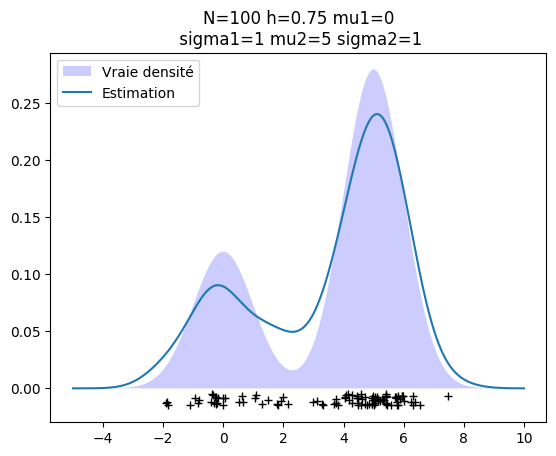

In [ ]:
#### Test du code
estimationdensite(100,0.75,0,1,5,1)

### Question 2
Comparer à tout autre paramètre fixés comme dans la question précédente, l’influence de la fenêtre
h. On pourra tester des valeurs de h comprises entre $0.2$ et $1.5$. Commenter.

Pour comparer l'influence de la fenêtre h sur l'estimation de densité, on peut appeler la fonction estimationdensite avec différentes valeurs de h et observer les résultats. On peut par exemple utiliser une boucle pour tester des valeurs de h comprises entre 0.2 et 1.5 avec un pas de 0.1. Voici un exemple de code :

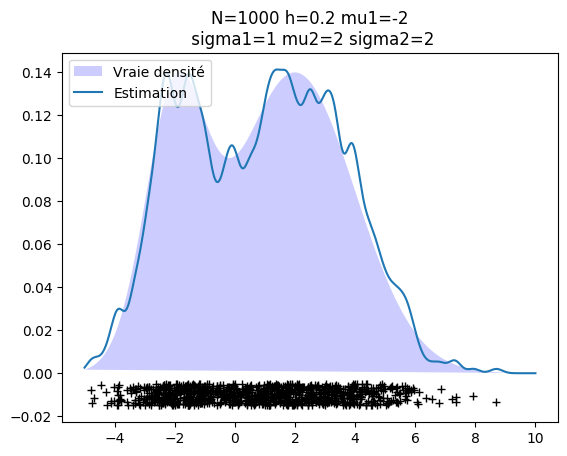

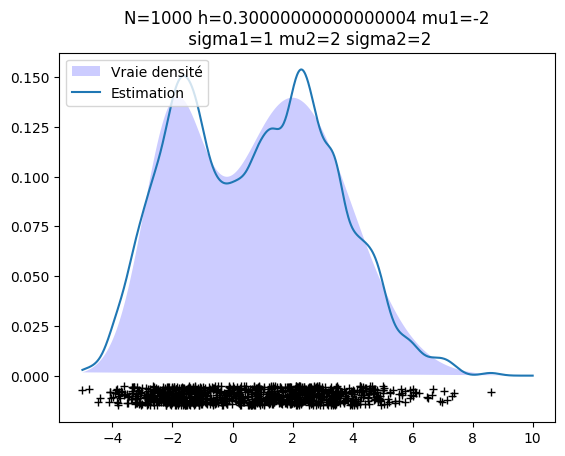

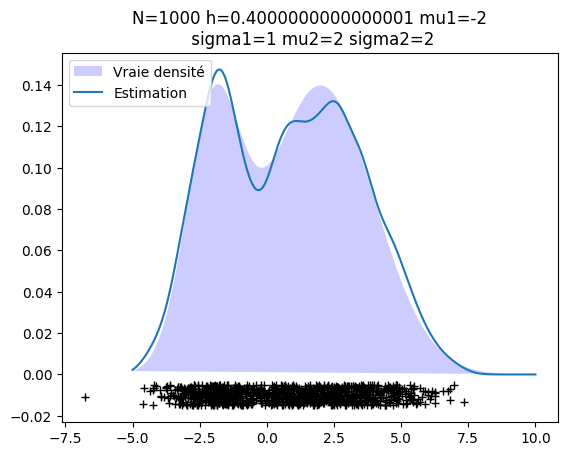

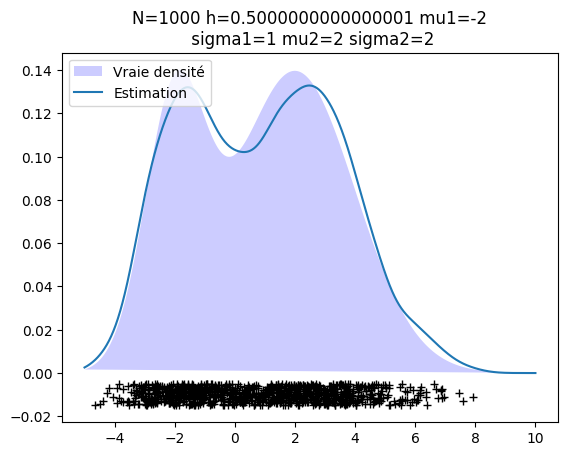

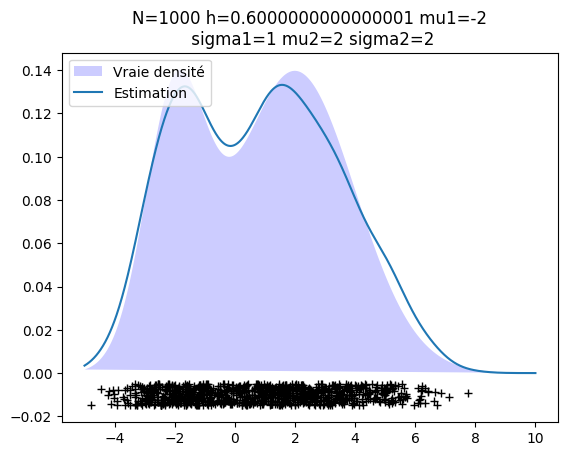

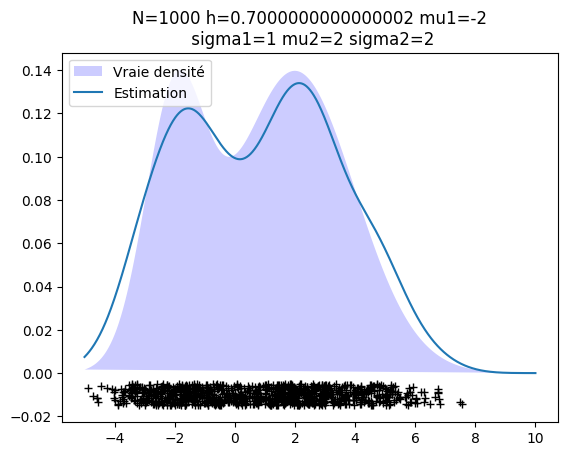

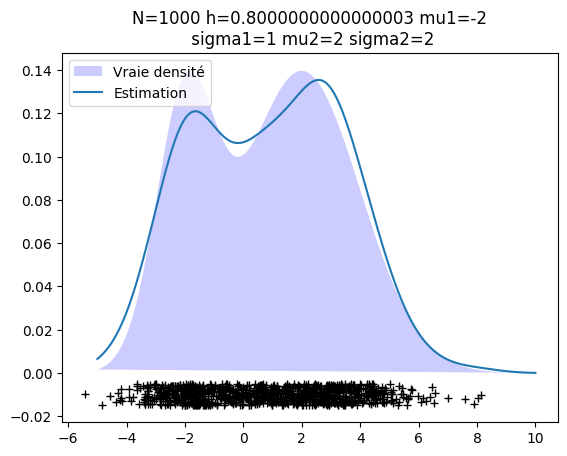

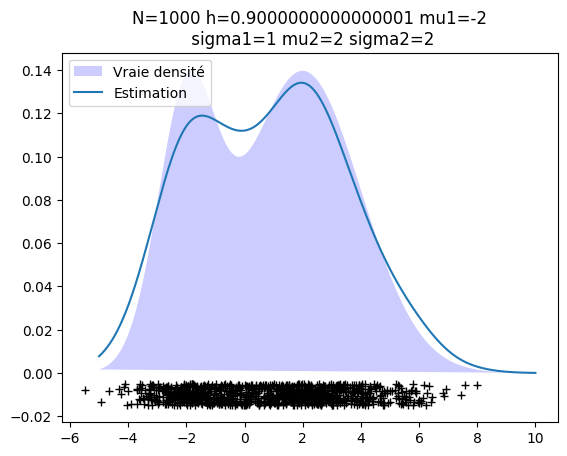

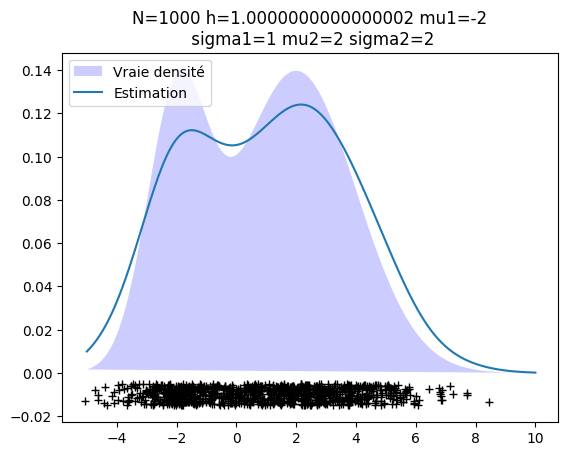

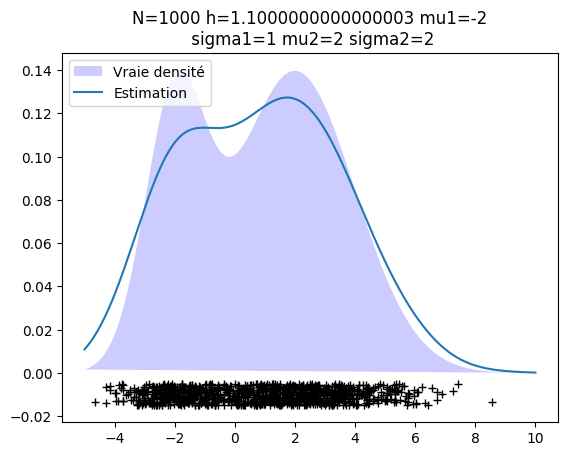

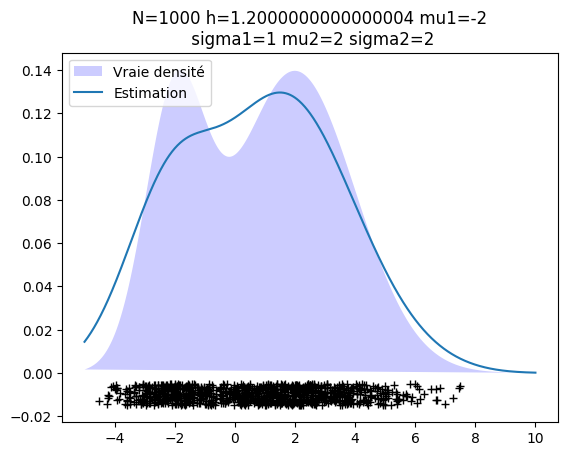

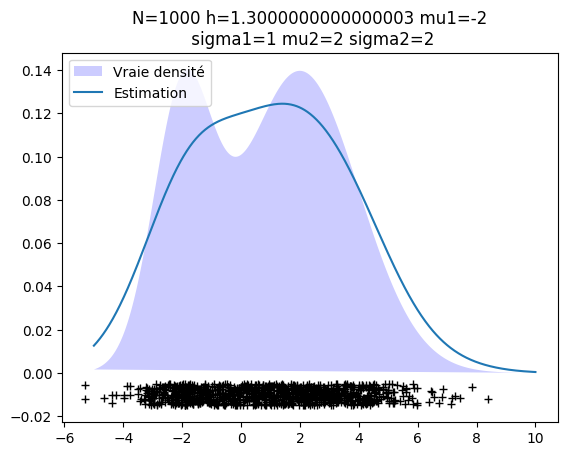

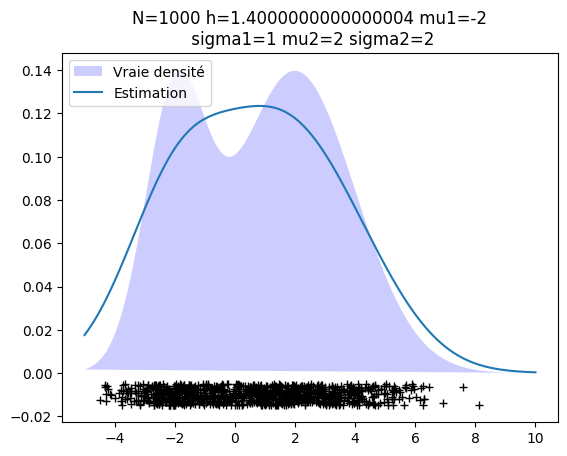

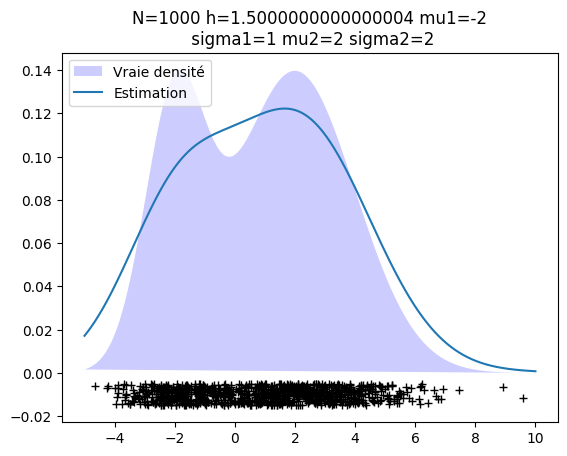

In [ ]:
mu1 = -2
sigma1 = 1
mu2 = 2
sigma2 = 2
N = 1000

for h in np.arange(0.2, 1.6, 0.1):
    estimationdensite(N, h, mu1, sigma1, mu2, sigma2)


En examinant ces graphes, on constate que plus la valeur de h est élevée, plus l'estimation de densité est lissée, ce qui signifie que les pics et les creux sont moins prononcés. En revanche, lorsque les valeurs de h sont plus petites, l'estimation de densité est plus bruitée, avec des pics et des creux plus marqués. Par conséquent, on peut conclure que le choix de la fenêtre h dépend de l'objectif visé, c'est-à-dire s'il faut obtenir une estimation précise ou une estimation globale 

###Question 3
Faite varier les paramètres des deux lois gaussiennes qui définissent le mélange gaussien. Commenter.

In [ ]:
# Variation des paramètres des lois normales
mu1_list = [-2, 0, 2]
sigma1_list = [0.5, 1, 1.5]
mu2_list = [0, 2, 4]
sigma2_list = [0.5, 1, 1.5]

# Fixer les paramètres n, h
N = 1000
h = 0.5

# Générer et tracer les échantillons pour chaque combinaison de paramètres
for mu1 in mu1_list:
    for sigma1 in sigma1_list:
        for mu2 in mu2_list:
            for sigma2 in sigma2_list:
                estimationdensite(N, h, mu1, sigma1, mu2, sigma2)


Output hidden; open in https://colab.research.google.com to view.

Si l'écart-type d'une des lois gaussiennes est augmenté, on remarquera une plus grande dispersion des données, entraînant une distribution estimée plus large et plate. De même, si la moyenne d'une des lois gaussiennes est augmentée, on observera un déplacement de la distribution estimée vers la droite.

###Question 4
Faite varier N et commenter

*INSERT ANSWER HERE*

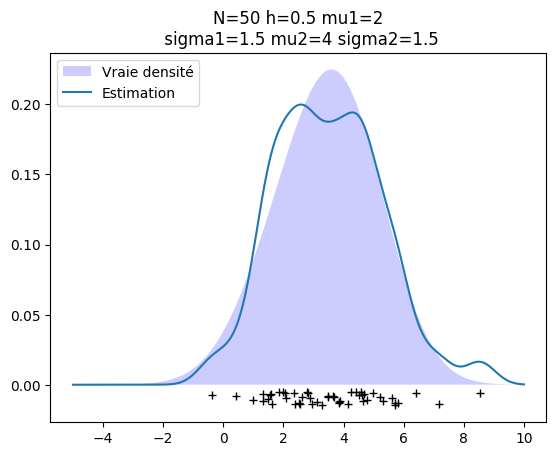

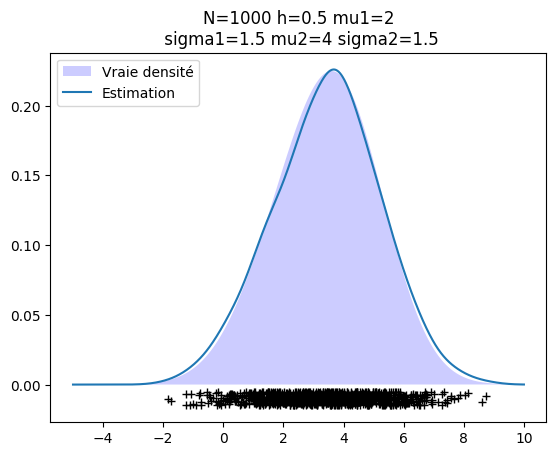

In [ ]:
N50 = 50
N1000 = 1000

estimationdensite(N50, h, mu1, sigma1, mu2, sigma2)

estimationdensite(N1000, h, mu1, sigma1, mu2, sigma2)

Encore une fois le nombre d'échantillons augmente la qualité de l'éstimation 

### Question 5
On peut aussi tester d’autres noyaux par exemple en remplaçant ’$gaussian$’ dans le code par
’$epanechnikov$’. Réaliser ce graphique en executant la fonction **estimationdensite2** avec les mêmes
paramètres que ceux de la question 1.

In [ ]:
def estimationdensite2(N,h,mu1,sigma1,mu2,sigma2):
        # générer l'échantillon à partir de deux lois normales
        X = np.concatenate((np.random.normal(mu1, sigma1, int(0.3 * N)),
                            np.random.normal(mu2, sigma2, int(0.7 * N))))[:, np.newaxis]

        # préparer les points oÃ¹ on calculera la densité
        X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

        # préparation de l'affichage de la vraie densité, qui est celle à partir
        #  de laquelle les données ont été générées (voir plus haut)
        # la pondération des lois dans la somme est la pondération des lois
        #  dans l'échantillon généré (voir plus haut)
        true_density = (0.3 * norm(mu1,sigma1).pdf(X_plot[:,0]) + 0.7 * norm(mu2,sigma2).pdf(X_plot[:,0]))

        # estimation de densité par noyaux d'epanechnikov
        kde = KernelDensity(kernel='epanechnikov', bandwidth=h).fit(X)   


        # calcul de la densité pour les données de X_plot
        density = np.exp(kde.score_samples(X_plot))

        # affichage : vraie densité et estimation
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
        ax.plot(X_plot[:,0], density, '-', label="Estimation")
        ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
        ax.legend(loc='upper left')
        plt.show()      



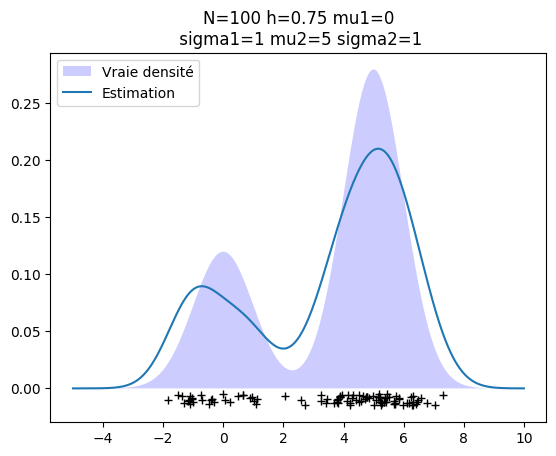

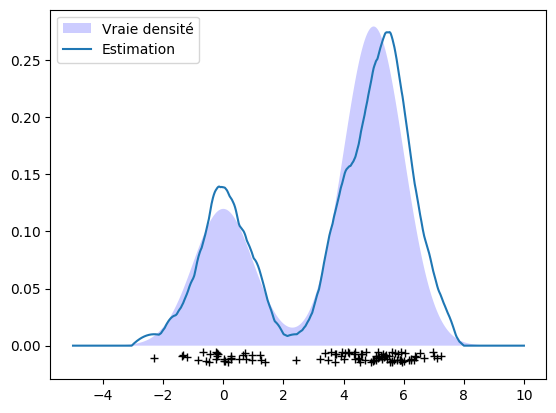

In [ ]:
estimationdensite(100,0.75,0,1,5,1)
estimationdensite2(100,0.75,0,1,5,1)

En général, l'estimateur de densité de noyau gaussien est plus couramment utilisé et constitue un bon choix lorsque la distribution sous-jacente est lisse et unimodale (c'est-à-dire qu'elle a un seul pic). Cependant, il peut ne pas bien fonctionner pour les distributions multimodales ou lorsque les données ont des bords tranchants ou des queues lourdes.

D'autre part, l'estimateur de densité de noyau Epachnikov peut mieux fonctionner dans ces cas, car il convient mieux aux distributions avec des bords tranchants ou des queues lourdes. Il a également tendance à mieux fonctionner lorsque la taille de l'échantillon est relativement petite.